# **Project: Coffee Leaf Quadruple Classifier.**

## About Dataset

A particular data set that we have created for ourselves is a merging of the four datasets BrACoL , JMuBEN, JMuBEN2 , RoCoL , and LiCoLe, we have made several adjustments to fit us and we called the modified dataset is [Dataset_(CLQC)](/content/drive/MyDrive/Dataset_(CLQC)).

For this project, the following tools were used:
- [Tensorflow 2](https://www.tensorflow.org/install) for building and training the model;
- [Numpy](https://numpy.org/) for working with arrays;
- [Matplotlib](https://matplotlib.org/) for visualizing the data.




## Installing and importing dependencies

Let’s start by importing all the necessary libraries.

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import keras,os
import operator
import time
import itertools
import tensorflow
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import sklearn
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline




## Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data preprocessing
The following steps of the data preprocessing are:
- data Augumentation;
- data samples visualization;

Let’s generate training and validation data using the data generator

In [ ]:
train_path = '/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2'
valid_path = '/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Testing_or_Validation_set/Stage_2'

train_stage2 = os.path.join(train_path, 'Stage_2')
train_rust = os.path.join(train_stage2, '0_Rust')
train_brownspots = os.path.join(train_stage2, '1_Brown_Spots')
train_sootymlds = os.path.join(train_stage2, '2_Sooty_Molds')

validation_stage2 = os.path.join(valid_path, 'Stage_2')
validation_rust = os.path.join(validation_stage2, '0_Rust')
validation_brownspots = os.path.join(validation_stage2, '1_Brown_Spots')
validation_sootymlds = os.path.join(validation_stage2, '2_Sooty_Molds')

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = True)
valid_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')
valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

LABELS = ['0_Rust', '1_Brown_Spots', '2_Sooty_Molds']
IMAGE_SIZE = [224, 224]
IMG_SHAPE  = 224
batch_size = 8

Found 8000 images belonging to 3 classes.
Found 626 images belonging to 3 classes.


In [ ]:
NM_train_0_Rust = len(os.listdir('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2/0_Rust'))
NM_train_1_Brown_Spots = len(os.listdir('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2/1_Brown_Spots'))
NM_train_2_Sooty_Molds = len(os.listdir('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2/2_Sooty_Molds'))

NM_validation_0_Rust = len(os.listdir('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Testing_or_Validation_set/Stage_2/0_Rust'))
NM_validation_1_Brown_Spots = len(os.listdir('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Testing_or_Validation_set/Stage_2/1_Brown_Spots'))
NM_validation_2_Sooty_Molds = len(os.listdir('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Testing_or_Validation_set/Stage_2/2_Sooty_Molds'))

print("Total Training Rust Images",NM_train_0_Rust)
print("Total Training Brown Spots Images",NM_train_1_Brown_Spots)
print("Total Training Sooty Molds Images",NM_train_2_Sooty_Molds)
print("--")
print("Total validation Rust Images",NM_validation_0_Rust)
print("Total validation Brown Spots Images",NM_validation_1_Brown_Spots)
print("Total validation Sooty Molds Images",NM_validation_2_Sooty_Molds)
print("--")
total_train = NM_train_0_Rust + NM_train_1_Brown_Spots + NM_train_2_Sooty_Molds
total_validation = NM_validation_0_Rust + NM_validation_1_Brown_Spots + NM_validation_2_Sooty_Molds

print("Total Training Images",total_train)
print("--")
print("Total Validation Images",total_validation)

Total Training Rust Images 2666
Total Training Brown Spots Images 2667
Total Training Sooty Molds Images 2667
--
Total validation Rust Images 266
Total validation Brown Spots Images 177
Total validation Sooty Molds Images 183
--
Total Training Images 8000
--
Total Validation Images 626


Visualizing data samples:

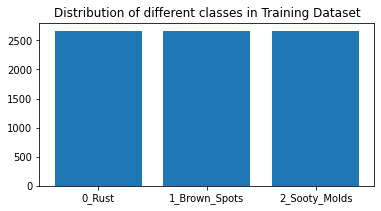

In [ ]:
nimgs={}
for i in LABELS:
  nimages=len(os.listdir('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2'+'/'+i))
  nimgs[i]=nimages
plt.figure(figsize=(6, 3))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()




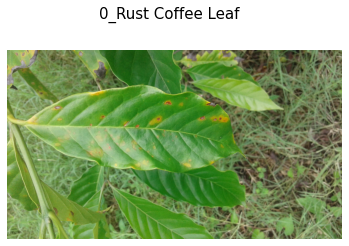

In [ ]:
img1 = load_img('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2/0_Rust/0_R (1000).jpg') 
plt.suptitle("0_Rust Coffee Leaf", size=15) 
plt.axis('off')
_=plt.imshow(img1)

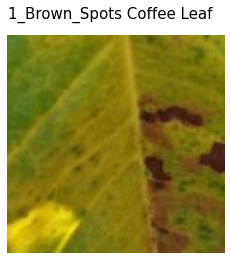

In [ ]:
img = load_img('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2/1_Brown_Spots/1_BS (1).jpg')
plt.suptitle("1_Brown_Spots Coffee Leaf", size=15)
plt.axis('off')
_ = plt.imshow(img)


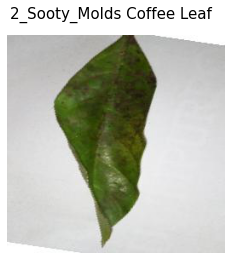

In [ ]:
img = load_img('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/Dataset/Training_set/Stage_2/2_Sooty_Molds/2_SM (1002).jpg')
plt.suptitle("2_Sooty_Molds Coffee Leaf", size=15)
plt.axis('off')
_ = plt.imshow(img)

## Implementation of DenseNet121


In [ ]:
model_d= tf.keras.applications.densenet.DenseNet121(include_top=False,
    weights="imagenet",
    input_shape=IMAGE_SIZE + [3])

29084464/29084464 [==============================] - 0s 0us/step


 * use the output of the first 3 layers to last layers of the model and store it into variable x. For the activation,  freeze the weights of all the layers except for the last nine(9) layers.




In [ ]:
for layer in model_d.layers[:-9]:
    layer.trainable= False

In [ ]:
x= model_d.layers[-3].output
x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

predictions= Dense(3, activation = 'softmax')(x)
model= Model(inputs= model_d.input, outputs= predictions)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

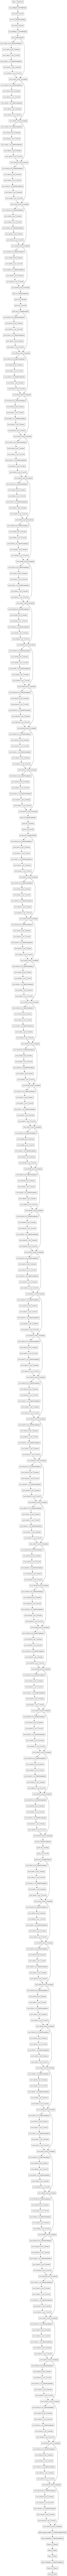

In [ ]:
model.summary()
keras.utils.plot_model(model, "/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/img/model_Densenet121_S2.png")

**compile and fit the model:**

There are a few metrics will be helpful when evaluating the performance of DL models:

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

Now we need to compile our model so that we can train it

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer= 'adam' ,metrics=[METRICS])

In [ ]:
checkpoint = ModelCheckpoint('Densenet121_checkpoint_S2.h5', monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto')

early = EarlyStopping(monitor='val_loss', 
                      min_delta=0, 
                      patience=20, 
                      verbose=1, 
                      mode='auto')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                           patience=5, mode='min', verbose=1,
                           min_lr=1e-5)

Densenet121_classifier = model.fit(
  training_set,  
  validation_data=valid_set,
  epochs=300,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set),
  verbose = True,
  callbacks=[checkpoint, early, reduce_lr])

Epoch 1/300
1000/1000 [==============================] - ETA: 0s - loss: 0.5008 - tp: 6514.0000 - fp: 1349.0000 - tn: 14651.0000 - fn: 1486.0000 - accuracy: 0.8819 - precision: 0.8284 - recall: 0.8142 - auc: 0.9437 - prc: 0.8979
Epoch 1: val_accuracy improved from -inf to 0.95421, saving model to Densenet121_checkpoint_S2.h5
1000/1000 [==============================] - 2791s 3s/step - loss: 0.5008 - tp: 6514.0000 - fp: 1349.0000 - tn: 14651.0000 - fn: 1486.0000 - accuracy: 0.8819 - precision: 0.8284 - recall: 0.8142 - auc: 0.9437 - prc: 0.8979 - val_loss: 0.2881 - val_tp: 582.0000 - val_fp: 42.0000 - val_tn: 1210.0000 - val_fn: 44.0000 - val_accuracy: 0.9542 - val_precision: 0.9327 - val_recall: 0.9297 - val_auc: 0.9709 - val_prc: 0.9406 - lr: 0.0010
Epoch 2/300
1000/1000 [==============================] - ETA: 0s - loss: 0.2824 - tp: 7043.0000 - fp: 886.0000 - tn: 15114.0000 - fn: 957.0000 - accuracy: 0.9232 - precision: 0.8883 - recall: 0.8804 - auc: 0.9778 - prc: 0.9590
Epoch 2: val

##Save Model

In [ ]:

model.save('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/pre_trained/Stage2_CLQC_Densenet121.h5')
print('Seved')

model.save_weights('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/pre_trained/Stage2_CLQC_Densenet121_Wei.h5')
print('Seved weights')

Seved
Seved weights


In [ ]:
#model = keras.models.load_model('/content/drive/MyDrive/Graduation Project/phase 2/‏‏Dataset_CLQC/pre_trained/Stage1_CLQC_Densenet121_checkpoint.h5')

**Plot Accuracy:**

Text(0.5, 1.0, 'Accuracy Evolution')

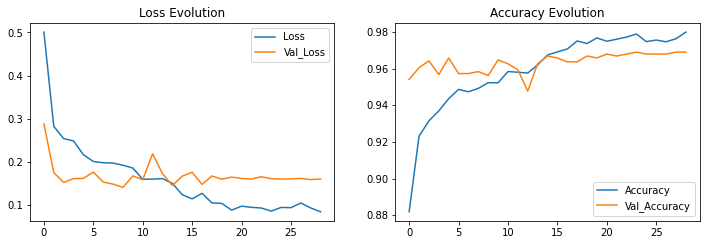

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Densenet121_classifier.history['loss'], label='Loss')
plt.plot(Densenet121_classifier.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(Densenet121_classifier.history['accuracy'], label='Accuracy')
plt.plot(Densenet121_classifier.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

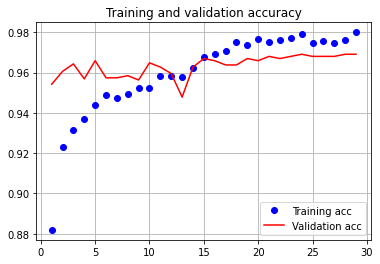

<Figure size 864x576 with 0 Axes>

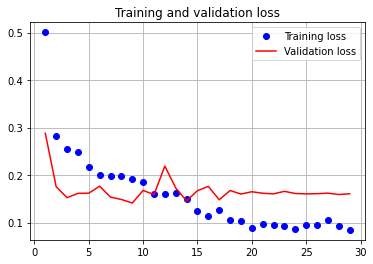

<Figure size 864x576 with 0 Axes>

In [ ]:
acc = Densenet121_classifier.history['accuracy']
epochs = range(1, len(acc) + 1)
val_acc = Densenet121_classifier.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.grid()

plt.savefig('acc.png')
plt.figure(figsize=(12, 8))
plt.show()


loss = Densenet121_classifier.history['loss']
val_loss = Densenet121_classifier.history['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.grid()

plt.savefig('loss.png')
plt.figure(figsize=(12, 8))
plt.show()

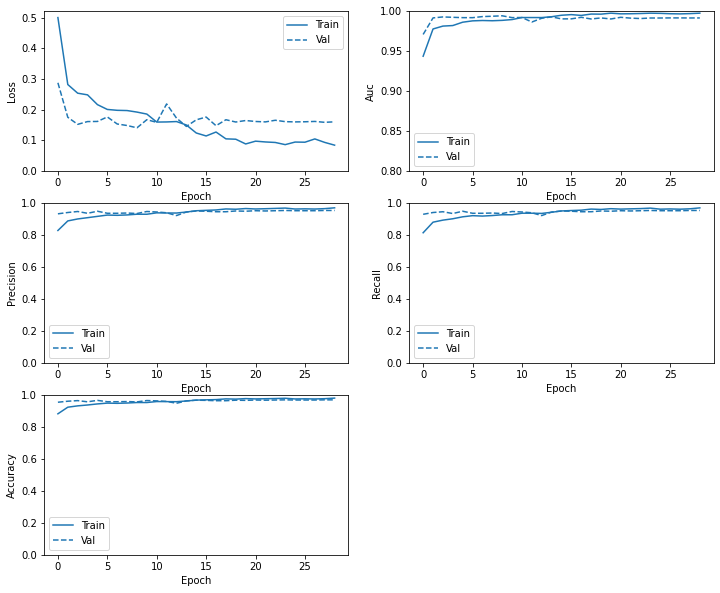

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall', 'accuracy']
  mpl.rcParams['figure.figsize'] = (12, 10)
  colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(3,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    elif metric == 'accuracy':
      plt.ylim([0,1])  
    else:
      plt.ylim([0,1])
 
    plt.legend()
 
plot_metrics(Densenet121_classifier)

**Confusion Matrix:**

In [ ]:
import numpy as np
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
# tp: 7759.0000 - fp: 238.0000 - tn: 15762.0000 - fn: 241.0000 - accuracy: 0.9800

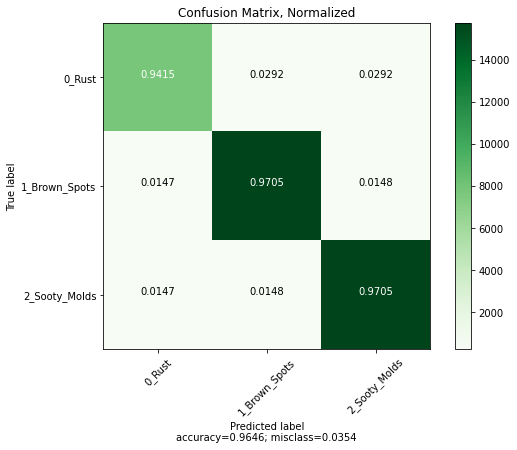

' plot_confusion_matrix(cm       = np.array([[ tp,  fn,  fn ], #those numbers are added manually  \n                                               [ fp,  tn,  fn],\n                                               [ fp,  fn,  tn]]), '

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 7759.0000, 241.0000,  241.0000],
                                               [ 238.0000, 15762.0000, 241.0000],
                                               [ 238.0000, 241.0000,  15762.0000]]), 
                      normalize    = True,
                      target_names = ['0_Rust', '1_Brown_Spots', '2_Sooty_Molds'],
                      title        = "Confusion Matrix, Normalized")

""" plot_confusion_matrix(cm       = np.array([[ tp,  fn,  fn ], #those numbers are added manually  
                                               [ fp,  tn,  fn],
                                               [ fp,  fn,  tn]]), """